# Laboratorio 1

integrantes: 

    - Francis Aguilar - 22243 
    - Diego García - 22404 
    - Angela García -22869 

enlace al repositorio: https://github.com/angelargd8/lab1-modsim


# Ejercicio 1 - Fundamentos de Sistemas de Stock y Flujo

## Teoría 
1. **Definición de:**

    a. **Stock**
        Estas son las cantidades acumuladas de algo en algun sistema en un momento dado. Estos representan el estado del sistema y son variables que cambian lentamente con el tiempo
    
    b. **Flujo**
        Los fujos o las tasas de cambio, son las tasas de entrada o salida que modifican los stocks, estos van expresando cómo es que cambian los stocks por el largo del tiempo, este es positivo si aumenta y negativa si disminuye.

    c. **Bucle de retroalimentación**
        Este es un buble de causa y efecto, en donde los cambios en un stock afectan a los flujos y estos afectan a los stocks. 


2. **Definición con notación matemática y explicación de:**
    
    a. **Ecuación de acumulación de stock**

    Un stock $$S(t) $$ en cualquier sistema dinámico es: 


    $$
    S(t) = S(t_0) + \int_{t_0}^{t} \left[\text{Entradas}(\tau) - \text{Salidas}(\tau)\right] \, d\tau
    $$
    
    Y en su forma diferencial: 

    $$
    \frac{dS(t)}{dt} = \text{Entradas}(t) - \text{Salidas}(t)
    $$

    Esto es porque el stock en un momento t es igual a su valor inicial más la acumulación neta de flujos a lo largo dle tiempo


    b. **Análisis dimensional de tasa de flujo**

    Si el stock tiene dimensión [S], su flujo F tiene:

    $$
    [F] = \frac{[S]}{[T]}
    $$

    [S]: unidades del stock

    [T]: unidad de tiempo
    
    c. **Forma de solución de decaimiento exponencial**

    Si un stock solo pierde cantidad proporcionalmente a su tamaño (sin entradas):

    $$
    \frac{dS(t)}{dt} = -k \, S(t)
    $$

    donde \( k > 0 \) es la constante de decaimiento \(( [k] = 1/[T] )\).

    
    la solución sería:

    $$
    S(t) = S_0 \, e^{-k t}
    $$


3. **Comparación y explicación de las diferencias de:**
    
    a. **Modelado de tiempo contínuo vs modelado de tiempo discreto** 

    | **Modelado de tiempo continuo** | **Modelado de tiempo discreto** |
    |---------------------------------|---------------------------------|
    | El tiempo se representa con una variable continua | El tiempo se divide en intervalos fijos |
    | se usan ecuaciones diferenciales para describir el cambio | se usan ecuaciones en diferencias o en iteraciones paso a paso |
    | Es util para sistemas en donde los cambios son constantes | Es útil cuando los cambios ocurren en eventos puntuales |



    
    b. **Retroalimentación balanceada vs reforzada**

    | **Retroalimentación balanceada** | **Retroalimentación reforzada** |
    |---------------------------------|---------------------------------|
    | Estabiliza el sistema y lo mantiene en equilibrio | Amplifica los cacmbios y genera un crecimiento o decrecimiento acelerado |
    | Actua como un mecanismo regulador, corrige desviaciones y busca un objetivo o estado estable | actua como un mecanismo amplificador, los pequeños cambios se vuelven mayores|
    | Condice a un equilibrio dinámico o a una oscilación controlada | Puede llevar a un crecimeinto exponencial o un colapso si no se regula|



4. **Interprete el significado de la constante de tiempo τ=1/α en sistemas del mundo real (por ejemplo, descomposición de la población, metabolismo de fármacos).**
    la constante de tiempo τ=1/α en sistemas del mundo real, el el caso que τ sea muy pequeño el sistema responde rápido, como una descomposición de la población rápida, un fármaco que se elimina más rápido del metabolismo. Y si es grande, entonces pues el sistema responde lento. Que se descomene lenta la población y el fármaco permanece más tiempo en el metabolismo




## **Referencias**: 
- Bucle de retroalimentación: Definición y ejemplos. (2020, noviembre 11). Estudyando. https://estudyando.com/bucle-de-retroalimentacion-definicion-y-ejemplos/
- ¿Cómo se incorporan los bucles de retroalimentación y los retrasos en los diagramas de stock y flujo? (s. f.). Recuperado 15 de julio de 2025, de https://es.linkedin.com/advice/1/how-do-you-incorporate-feedback-loops-delays-stock?lang=es
- Dinámica de sistemas _ AcademiaLab. (s. f.). Recuperado 15 de julio de 2025, de https://academia-lab.com/enciclopedia/dinamica-de-sistemas/


-------------
Enlace para probar las fórmulas en jupyter: https://www.mathjax.org/#demo

### Práctica - parte 1
Disminución de la población debido a una tasa de mortalidad constante

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# modelo stock-flujo

#poblacion inicial 
S0 = 1000  # Susceptibles
#tasa de mortalidad 
a = 0.01 
#horizonte de tiempo, meses
T = 24
#requerimientos
#integracion de euler con pasos discretos 
dt=0.1

#tiempo
t_values= np.arange(0, T+dt, dt)

#solucion numerica - euler
S_values=[S0]
for t in t_values[1:]:
    dS= -a*S_values[-1]
    S_values.append(S_values[-1] + dS * dt)

#solucion analitica
S_analytic=S0*np.exp(-a *t_values)


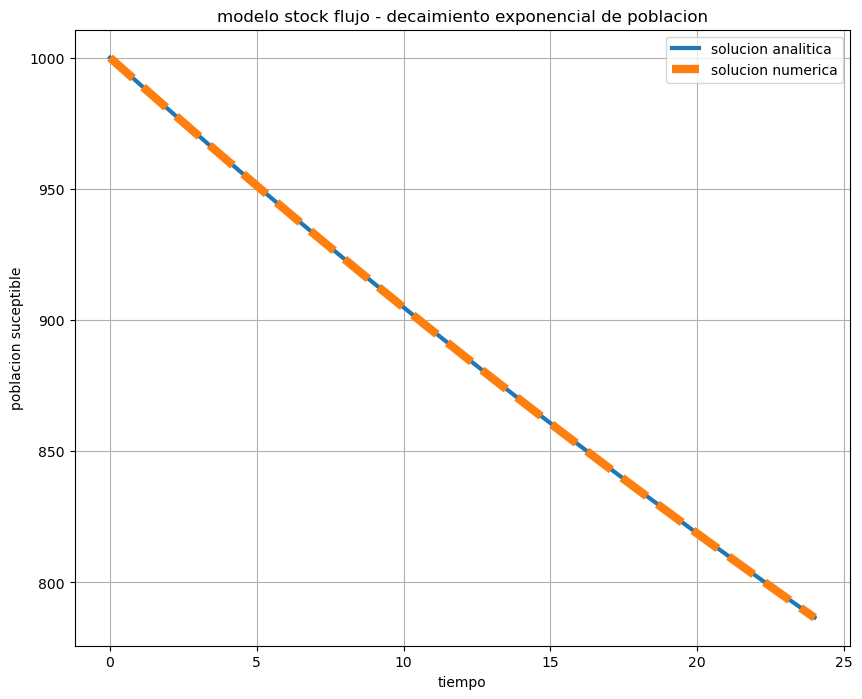

In [15]:
#comparar la solucion analitica
#graficar la solucion numerica y analitica
plt.figure(figsize=(10,8))
plt.title("modelo stock flujo - decaimiento exponencial de poblacion")
plt.plot(t_values, S_analytic, label="solucion analitica", linewidth=3)
plt.plot(t_values, S_values, label="solucion numerica", linestyle="--", linewidth=6)

plt.xlabel("tiempo")
plt.ylabel("poblacion suceptible")
plt.legend()
plt.grid(True)
plt.show()


a. ¿Cómo altera la vacunación los ciclos de retroalimentación?

La vacunación, agrega un flujo que reduce el stock de suceptibles y lo pasa a otro stock. Esto es porque en un modelo sin vacunación, los suceptibles solo disminuyen si contraen la infección o por mortalidad. Entonces, la vacunación, debilita el ciclo de "más infectados -> más transmisión -> más infectados", porque debilita el número de susceptibles disponibles para ser infectados. Y a largo plazo, el sistema puede alcanzar un equilibrio con una proporción menor de infectados o eliminar la propagación si el grupo llega a ser inmune. 

b. ¿Cuál es el valor mínimo de v para prevenir un brote? 

El valor mínimo debe de ser $$R_e$$ menor que 1. 
usando la formula de 
$$
R_e = R_0 * (1-p) < 1
$$
En donde

$$
R_e : \text{es el número reproductivo basico}
$$ 


$$
p : \text{proporción de individuos inmunes}
$$ 


$$
(1-p) : \text{proporción suceptibles en la población}
$$ 


al despejar la proporción inmune necesaria: 

$$
R_0 \cdot (1 - p) < 1
$$


$$
1 - p < \frac{1}{R_0}
$$

$$
p > 1 - \frac{1}{R_0}
$$

Entonces,  la proporción mínima inmunizada es:

$$
p_{\text{mín}} = 1 - \frac{1}{R_0}
$$

Si se asume que toda la inmunidad proviene de la vacunación y que la vacuna es 100% efectiva, entonces: 

$$
v_{\text{mín}} = p_{\text{mín}} = 1 - \frac{1}{R_0}
$$


